In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [2]:
def pearson_coeff(x,y):
    std_x = np.std(x)
    std_y = np.std(y)
    cov_xy = np.cov(x,y)[0,1]
    coeff = cov_xy/(std_x*std_y)
    return coeff

# Testing part and organization of the data 

In [3]:
'''
#fblue = fits.open('master_flat_median_20220316_SDSSg_65_94.fits')
#fblue = fits.open('master_flat_median_20220316_SDSSg_65_94_renormalised.fits')
fblue = fits.open('master_flat_median_20210708_BG40_83_92_renormalised.fits')
#fred = fits.open('master_flat_median_20220316_SDSSr_110_124_renormalised.fits')
fred = fits.open('master_flat_median_20211007_FELH0600_63_115_renormalised.fits')
# Tests 
#fred = fits.open('master_flat_median_20211104_FELH0600_61_115.fits')
#fred = fits.open('master_flat_median_20211007_FELH0600_63_115.fits')
#fratio = fits.open('ratio_master_flat_median_SDSSr_SDSSg.fits')
'''

"\n#fblue = fits.open('master_flat_median_20220316_SDSSg_65_94.fits')\n#fblue = fits.open('master_flat_median_20220316_SDSSg_65_94_renormalised.fits')\nfblue = fits.open('master_flat_median_20210708_BG40_83_92_renormalised.fits')\n#fred = fits.open('master_flat_median_20220316_SDSSr_110_124_renormalised.fits')\nfred = fits.open('master_flat_median_20211007_FELH0600_63_115_renormalised.fits')\n# Tests \n#fred = fits.open('master_flat_median_20211104_FELH0600_61_115.fits')\n#fred = fits.open('master_flat_median_20211007_FELH0600_63_115.fits')\n#fratio = fits.open('ratio_master_flat_median_SDSSr_SDSSg.fits')\n"

In [4]:
filter_files = {'SDSSr':'master_flat_median_20220316_SDSSr_110_124_renormalised.fits',
                'SDSSg':'master_flat_median_20220316_SDSSg_65_94_renormalised.fits',
               'FELH0600':'master_flat_median_20211007_FELH0600_63_115_renormalised.fits',
               'BG40':'master_flat_median_20210708_BG40_83_92_renormalised.fits'}

In [5]:
date_dict = {'SDSSg':'2022-03-16','SDSSr':'2022-03-16','empty':'2021-07-08','BG40':'2021-07-08','FELH0600':'2021-10-07'}#,'FELH0600':'2021-11-04'}
range_dict = {'SDSSg':range(65,95),'SDSSr':range(110,125),'empty':range(62,73),'BG40':range(83,93),'FELH0600':range(63,116)}#,'FELH0600':range(89,116)}

In [6]:
filter1 = 'FELH0600'
filter2 = 'SDSSg'

In [7]:
filters = [filter1,filter2]

In [8]:
fred = fits.open(filter_files[filter1])
fblue = fits.open(filter_files[filter2])

In [9]:
seg = 1
shape0 = fred[1].data.shape
hprescan = 3
hoverscan = 64
voverscan = 48
over0red = fred[seg].data[shape0[0]-voverscan:,shape0[1]-hoverscan:]
over0blue = fblue[seg].data[shape0[0]-voverscan:,shape0[1]-hoverscan:]

(array([  1.,   0.,   0.,   1.,   0.,   0.,   4.,   0.,   0.,   8.,   0.,
          0.,  15.,   0.,   0.,   0.,  23.,   0.,   0.,  35.,   0.,   0.,
         75.,   0.,   0.,  89.,   0.,   0.,   0., 140.,   0.,   0., 163.,
          0.,   0., 279.,   0.,   0., 229.,   0.,   0., 320.,   0.,   0.,
          0., 279.,   0.,   0., 360.,   0.,   0., 208.,   0.,   0., 244.,
          0.,   0.,   0., 167.,   0.,   0., 156.,   0.,   0.,  82.,   0.,
          0.,  79.,   0.,   0.,  29.,   0.,   0.,   0.,  44.,   0.,   0.,
         15.,   0.,   0.,  17.,   0.,   0.,   5.,   0.,   0.,   0.,   3.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([14946.5  , 14946.655, 14946.81 , 14946.965, 14947.12 , 14947.275,
        14947.43 , 14947.585, 14947.74 , 14947.895, 14948.05 , 14948.205,
        14948.36 , 14948.515, 14948.67 , 14948.825, 14948.98 , 14949.135,
        14949.29 , 14949.445, 14949.6  , 14949.755, 14949.91 , 14950.065,
        14950.22 , 149

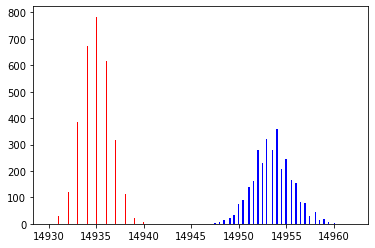

In [10]:
plt.hist(over0red.ravel(),bins=100,color='r')
plt.hist(over0blue.ravel(),bins=100,color='b')

In [11]:
#fred[0].header

In [12]:
shape0 = fred[1].data.shape

In [13]:
#fred[1].header

In [14]:
for i in range(1,len(fred)):
    print(i, fred[i].header['EXTNAME'])

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
9 Segment17
10 Segment16
11 Segment15
12 Segment14
13 Segment13
14 Segment12
15 Segment11
16 Segment10


In [15]:
num_segments = len(fred)-1

In [16]:
seg = 1

In [17]:
hprescan = 3
hoverscan = 64
voverscan = 48

In [18]:
data0red = fred[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
data0blue = fblue[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
data0ratio = data0red/data0blue

In [19]:
'''
#Testing part 
#seg must be a number between 1 and 17
seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(131)
ax.imshow(fred[seg].data,origin='lower',cmap="jet")#,norm=LogNorm())
ax=fig.add_subplot(132)
ax.imshow(fblue[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
#ax=fig.add_subplot(143)
#ax.imshow(fratio[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
ax=fig.add_subplot(133)
ax.imshow(fred[seg].data/fblue[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
'''

'\n#Testing part \n#seg must be a number between 1 and 17\nseg = 1\nfig = plt.figure(figsize=(10,10))\nax=fig.add_subplot(131)\nax.imshow(fred[seg].data,origin=\'lower\',cmap="jet")#,norm=LogNorm())\nax=fig.add_subplot(132)\nax.imshow(fblue[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\n#ax=fig.add_subplot(143)\n#ax.imshow(fratio[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\nax=fig.add_subplot(133)\nax.imshow(fred[seg].data/fblue[seg].data,origin=\'lower\',cmap="gray")#,norm=LogNorm())\n'

/tmp/ipykernel_7611/2358680070.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0red,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
/tmp/ipykernel_7611/2358680070.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0blue,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
/tmp/ipykernel_7611/2358680070.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0ratio,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())


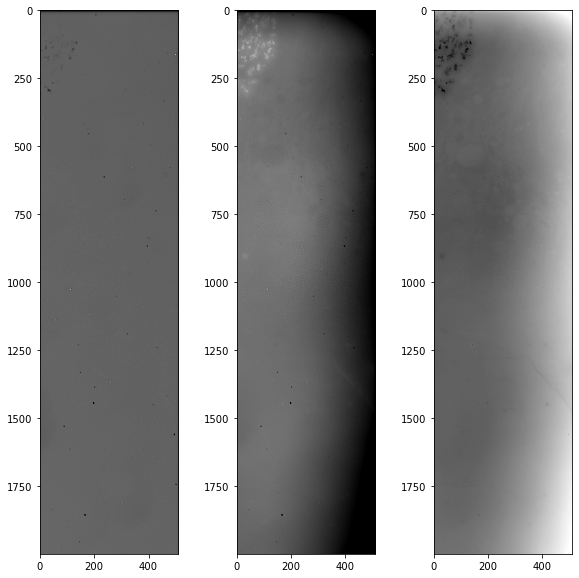

In [20]:
#seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(131)
ax.imshow(data0red,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
ax=fig.add_subplot(132)
ax.imshow(data0blue,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
#ax=fig.add_subplot(143)
#ax.imshow(fratio[seg].data,origin='lower',cmap="gray")#,norm=LogNorm())
ax=fig.add_subplot(133)
ax.imshow(data0ratio,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())

In [21]:
fred[seg].header['EXTNAME']

'Segment00'

(2048, 576)


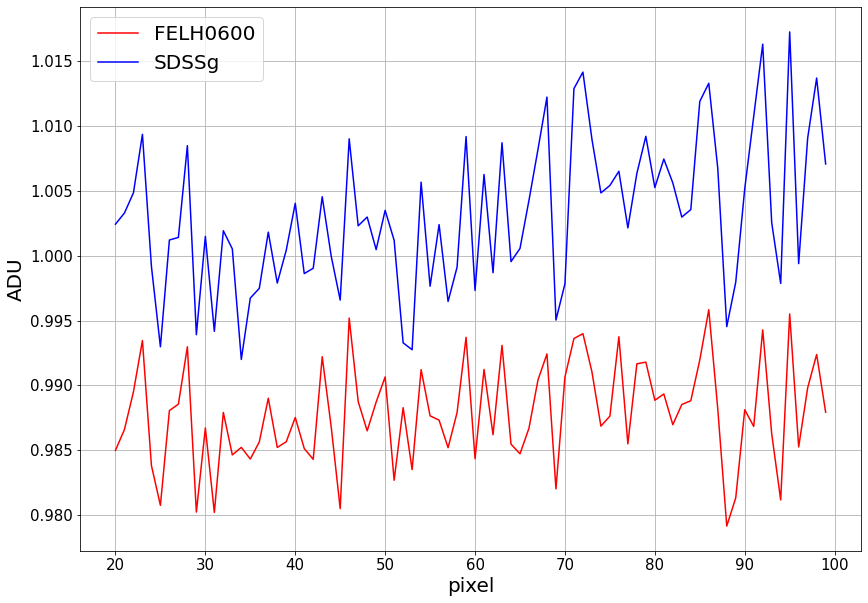

In [22]:
print(shape0)
fig = plt.figure(figsize=(14,10))
x_ = np.arange(20,100)
plt.plot(x_,data0red[1500,20:100],color='r',label=filter1)
plt.plot(x_,data0blue[1500,20:100],color='b',label=filter2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('pixel',fontsize=20)
plt.ylabel('ADU',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('./comparison_row_{0}_{1}_renormalised.png'.format(filter1,filter2))

In [23]:
print(pearson_coeff(data0red[1500,20:100],data0blue[1500,20:100]))

0.8436252226766727


In [24]:
print(np.mean(data0red),np.median(data0red),np.std(data0red))
print(np.mean(data0blue),np.median(data0blue),np.std(data0blue))
print(np.mean(data0ratio),np.median(data0ratio),np.std(data0ratio))

0.9846034212720526 0.9854820513768934 0.01540719171343573
0.9604889659139882 0.9803918463187504 0.05982130628550724
1.0289399501245524 1.0055216475355226 0.06326785335467826


(array([7.7000e+01, 7.0000e+01, 7.5000e+01, 8.0000e+01, 1.0800e+02,
        1.4100e+02, 1.7800e+02, 1.7600e+02, 2.2300e+02, 2.3400e+02,
        3.0300e+02, 3.1000e+02, 3.6500e+02, 4.3900e+02, 5.0000e+02,
        5.5500e+02, 5.8000e+02, 7.4500e+02, 8.4900e+02, 1.0750e+03,
        1.2060e+03, 1.6850e+03, 2.2550e+03, 3.4620e+03, 5.1440e+03,
        6.1780e+03, 6.9870e+03, 8.8720e+03, 1.6516e+04, 3.0927e+04,
        3.7353e+04, 4.1616e+04, 6.8528e+04, 8.5297e+04, 6.0343e+04,
        4.1254e+04, 3.1468e+04, 2.7765e+04, 2.8068e+04, 2.5186e+04,
        2.1134e+04, 1.9931e+04, 1.8710e+04, 1.7551e+04, 1.7001e+04,
        1.6195e+04, 1.5674e+04, 1.5102e+04, 1.4258e+04, 1.4087e+04,
        1.3844e+04, 1.3838e+04, 1.3106e+04, 1.2936e+04, 1.2597e+04,
        1.1858e+04, 1.1597e+04, 1.1557e+04, 1.1092e+04, 1.0975e+04,
        1.0774e+04, 1.0517e+04, 1.0284e+04, 1.0066e+04, 9.8170e+03,
        9.5540e+03, 9.4020e+03, 9.1870e+03, 8.8680e+03, 8.7420e+03,
        8.1220e+03, 7.6160e+03, 7.0020e+03, 6.43

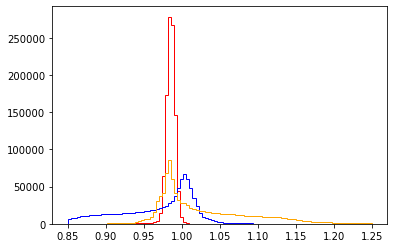

In [25]:
plt.hist(data0red.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='r')
plt.hist(data0blue.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='b')
plt.hist(data0ratio.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='orange')

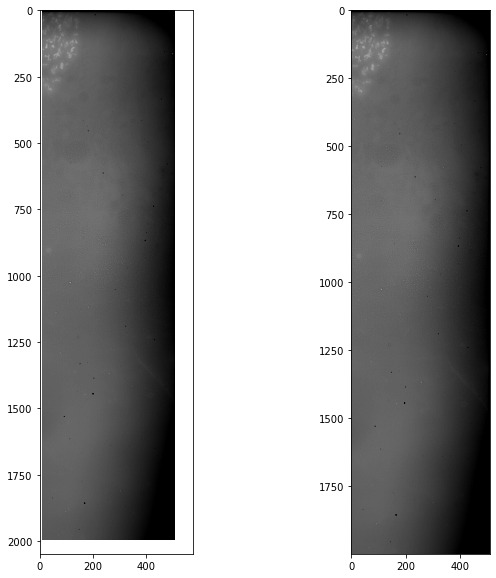

In [26]:
#seg = 1
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.imshow(fblue[seg].data,cmap="gray",vmin=0.85,vmax=1.25)#,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(data0blue,cmap="gray",vmin=0.85,vmax=1.25)#,norm=LogNorm())

/tmp/ipykernel_7611/2715301458.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(fred[seg].data,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
/tmp/ipykernel_7611/2715301458.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data0red,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())


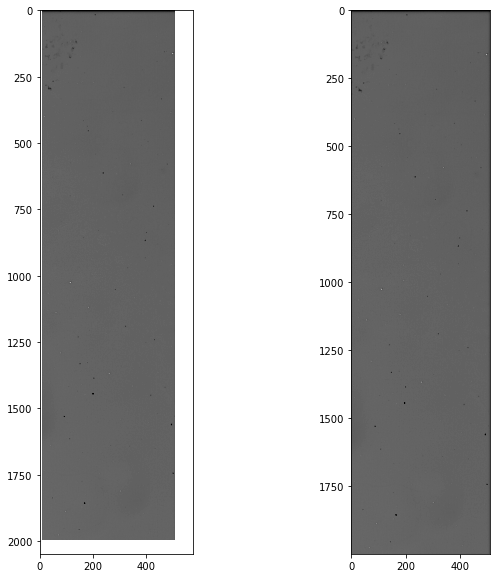

In [27]:
# If not specified, by default, the data is plotted with the origin on top of the image 
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.imshow(fred[seg].data,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(data0red,cmap="gray",vmin=0.85,vmax=1.25,norm=LogNorm())
#plt.savefig()

In [28]:
# This check does not actually make sense with the median flats (it does with the original flats) 
'''
# Check orientation on the data array itself: print values (above the 3 prescan pixels) from a row in the middle 
# and from a row at the end of the 2D array 
print(fred[seg].data[200,:10])
print(fred[seg].data[2010,:10])
print('---------------')
print(fblue[seg].data[200,:10])
print(fblue[seg].data[2010,:10])
'''

"\n# Check orientation on the data array itself: print values (above the 3 prescan pixels) from a row in the middle \n# and from a row at the end of the 2D array \nprint(fred[seg].data[200,:10])\nprint(fred[seg].data[2010,:10])\nprint('---------------')\nprint(fblue[seg].data[200,:10])\nprint(fblue[seg].data[2010,:10])\n"

In [29]:
'''
# We find that the rows above 2000 correspond entirely to overscan, while the one in the middle has data + overscan 
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.hist(fblue[seg].data[200,:])
ax=fig.add_subplot(122)
ax.hist(fblue[seg].data[2010,:])
# Then, the organisation of the data corresponds to the origin = "upper" (by default) orientation 
# This must be taken into account when removing the overscan regions 
'''

'\n# We find that the rows above 2000 correspond entirely to overscan, while the one in the middle has data + overscan \nfig = plt.figure(figsize=(10,10))\nax=fig.add_subplot(121)\nax.hist(fblue[seg].data[200,:])\nax=fig.add_subplot(122)\nax.hist(fblue[seg].data[2010,:])\n# Then, the organisation of the data corresponds to the origin = "upper" (by default) orientation \n# This must be taken into account when removing the overscan regions \n'

# Median smoothing 

In [30]:
'''
seg = 1
x0 = 3
x1 = 180
y0 = 50
y1 = 400
test = fred[seg].data[y0:y1,x0:x1]
testb = fblue[seg].data[y0:y1,x0:x1]
'''

'\nseg = 1\nx0 = 3\nx1 = 180\ny0 = 50\ny1 = 400\ntest = fred[seg].data[y0:y1,x0:x1]\ntestb = fblue[seg].data[y0:y1,x0:x1]\n'

In [31]:
'''
seg = 1
x0 = 3
x1 = 509
y0 = 0
y1 = 2000
test = fred[seg].data[y0:y1,x0:x1]
testb = fblue[seg].data[y0:y1,x0:x1]
'''

'\nseg = 1\nx0 = 3\nx1 = 509\ny0 = 0\ny1 = 2000\ntest = fred[seg].data[y0:y1,x0:x1]\ntestb = fblue[seg].data[y0:y1,x0:x1]\n'

In [32]:
'''
fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(121)
ax.imshow(fred[seg].data,origin='lower',cmap="jet")#,norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(fred[seg].data[y0:y1,x0:x1],origin='lower',cmap="jet")#,norm=LogNorm())
'''

'\nfig = plt.figure(figsize=(15,15))\nax=fig.add_subplot(121)\nax.imshow(fred[seg].data,origin=\'lower\',cmap="jet")#,norm=LogNorm())\nax=fig.add_subplot(122)\nax.imshow(fred[seg].data[y0:y1,x0:x1],origin=\'lower\',cmap="jet")#,norm=LogNorm())\n'

In [33]:
test = data0red

In [34]:
test_median_ = np.median(data0red.ravel())

In [35]:
smooth0 = ndimage.median_filter(test, size=2)
smooth1 = ndimage.median_filter(test, size=5)
smooth2 = ndimage.median_filter(test, size=10)
smooth3 = ndimage.median_filter(test, size=20)
smooth4 = ndimage.median_filter(test, size=40)
#smooth5 = ndimage.median_filter(test, size=355)

In [36]:
#img = ndimage.gaussian_filter(dblue_c, sigma=(5, 5, 0), order=0)
#smooth_blue = ndimage.gaussian_filter(dblue_c, sigma=5)

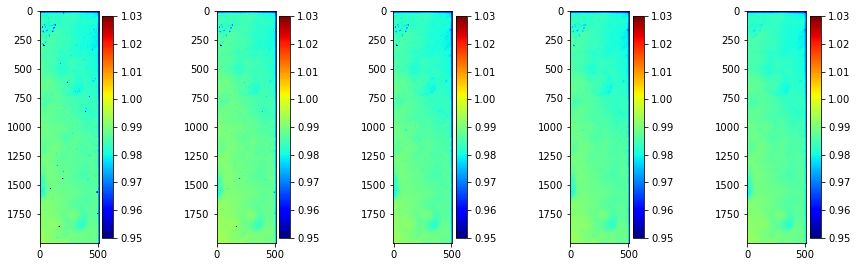

In [37]:
fig = plt.figure(figsize=(14,14))
ax=fig.add_subplot(191)
im=ax.imshow(test,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(193)
im=ax.imshow(smooth0,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(195)
im=ax.imshow(smooth1,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(197)
im=ax.imshow(smooth2,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
ax=fig.add_subplot(199)
im=ax.imshow(smooth3,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im, ax=ax)
#ax=fig.add_subplot(196)
#im=ax.imshow(smooth4,cmap="jet")#,norm=LogNorm())
#ax=fig.add_subplot(177)
#im=ax.imshow(smooth5,cmap="jet")#,norm=LogNorm())
#fig.colorbar(im, ax=ax)

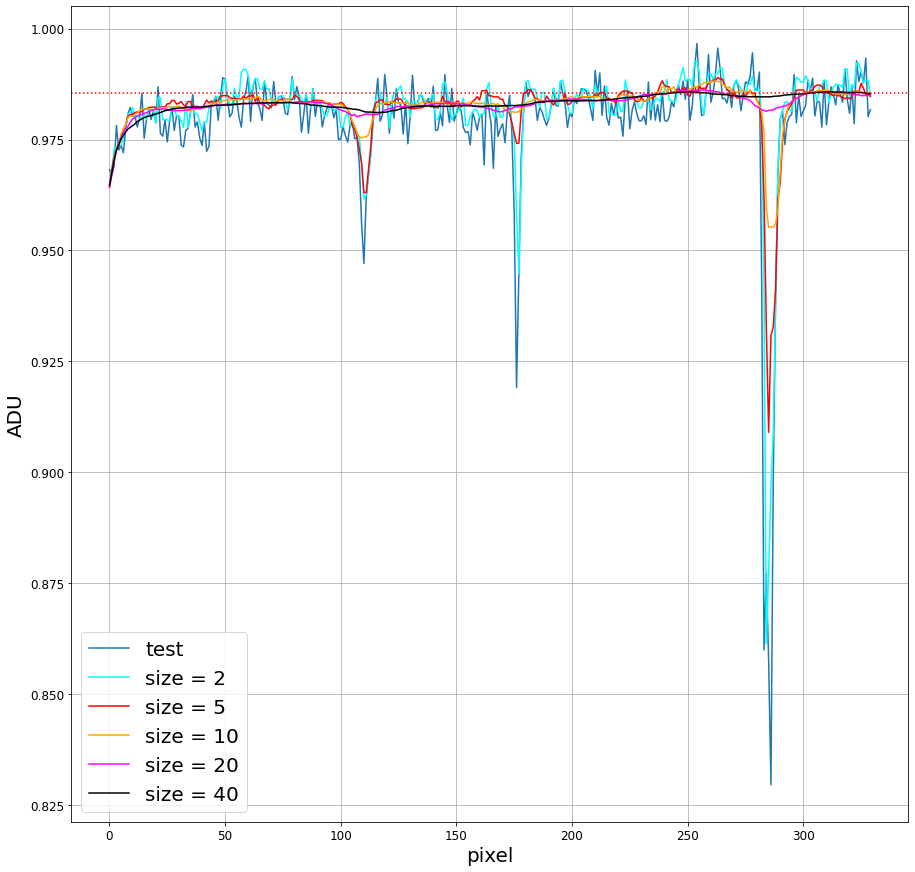

In [65]:
column = 36
y0 = 10
y1 = 340
fig = plt.figure(figsize=(15,15))
plt.plot(test[y0:y1,column],label='test')
plt.plot(smooth0[y0:y1,column],label='size = 2',color='cyan')
plt.plot(smooth1[y0:y1,column],label='size = 5',color='r')
plt.plot(smooth2[y0:y1,column],label='size = 10',color='orange')
plt.plot(smooth3[y0:y1,column],label='size = 20',color='magenta')
plt.plot(smooth4[y0:y1,column],label='size = 40',color='k')
#plt.plot(smooth5[y0:y1,column],label=r'$\sigma = 355$',color='pink')
plt.axhline(y=test_median_,ls=':',color='r')
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('pixel',fontsize=20)
plt.ylabel('ADU',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('./column{0}_{1}register_master_flat_{2}_renormalised.png'.format(column,seg,filter1))

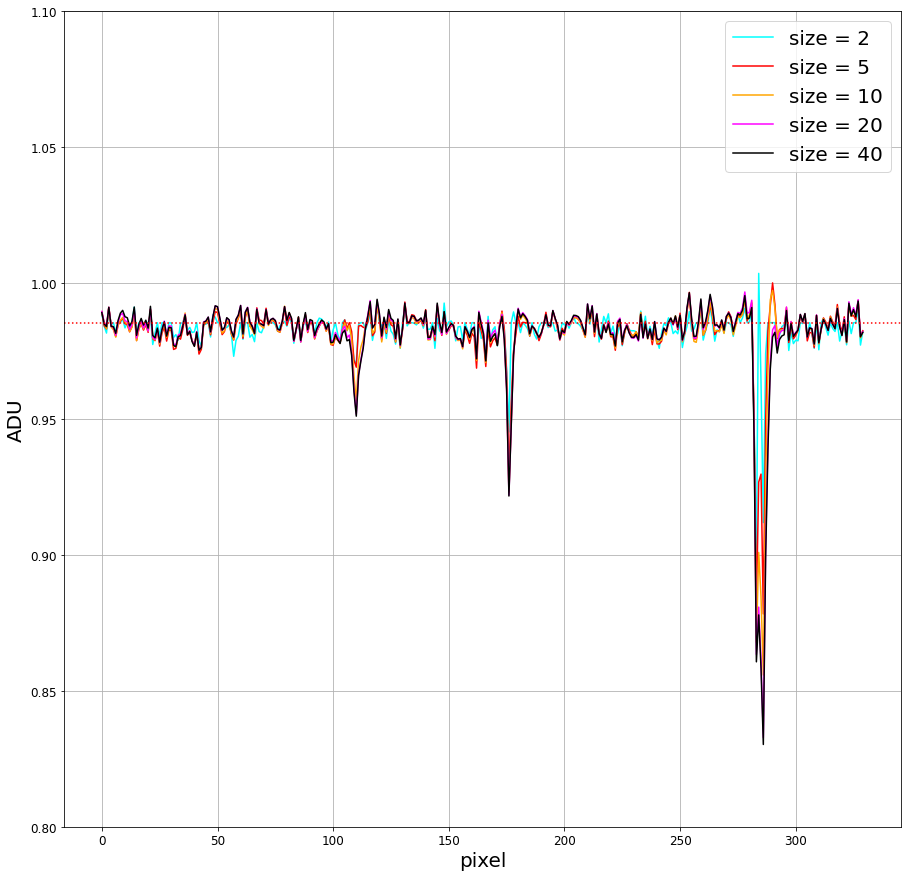

In [66]:
#column = 36
#y0 = 10
fig = plt.figure(figsize=(15,15))
#plt.plot(test[y0:y1,column]/smooth0[y0:y1,column],label='size = 2',color='cyan')
plt.plot(test[y0:y1,column]*test_median_/smooth0[y0:y1,column],label='size = 2',color='cyan')
plt.plot(test[y0:y1,column]*test_median_/smooth1[y0:y1,column],label='size = 5',color='r')
plt.plot(test[y0:y1,column]*test_median_/smooth2[y0:y1,column],label='size = 10',color='orange')
plt.plot(test[y0:y1,column]*test_median_/smooth3[y0:y1,column],label='size = 20',color='magenta')
plt.plot(test[y0:y1,column]*test_median_/smooth4[y0:y1,column],label='size = 40',color='k')
#plt.plot(test[y0:y1,column]/smooth5[y0:y1,column],label='size = 355$',color='pink')
plt.axhline(y=test_median_,ls=':',color='r')
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('pixel',fontsize=20)
plt.ylabel('ADU',fontsize=20)
plt.ylim(0.8,1.1)
plt.legend(fontsize=20)
plt.savefig('./column{0}_{1}register_master_flat_{2}_smoothed_renormalised.png'.format(column,seg,filter1))

In [40]:
#print(np.mean(test[:,column]/smooth0[:,column]).round(4),np.std(test[:,column]/smooth0[:,column]).round(4))
print(np.mean(test[:,column]*test_median_/smooth0[:,column]).round(4),np.std(test[:,column]/smooth0[:,column]).round(4))
print(np.mean(test[:,column]*test_median_/smooth1[:,column]).round(4),np.std(test[:,column]/smooth1[:,column]).round(4))
print(np.mean(test[:,column]*test_median_/smooth2[:,column]).round(4),np.std(test[:,column]/smooth2[:,column]).round(4))
print(np.mean(test[:,column]*test_median_/smooth3[:,column]).round(4),np.std(test[:,column]/smooth3[:,column]).round(4))
print(np.mean(test[:,column]*test_median_/smooth4[:,column]).round(4),np.std(test[:,column]/smooth4[:,column]).round(4))
#print(np.mean(test[:,column]/smooth5[:,column]).round(4),np.std(test[:,column]/smooth5[:,column]).round(4))

0.9835 0.0051
0.9836 0.009
0.9834 0.0109
0.9833 0.0136
0.983 0.0153


# Iterate over some size values for the smoothing and compare STD 

In [41]:
test.shape

(2000, 509)

In [42]:
#sigmas = [2,5,10,20,40,80,160,320,640,1280,2560]
sizes = [2,5,10,20,40,80]#,160,320,355,509,640]

In [67]:
std_raw = np.std(test)
print(std_raw)

0.01540719171343573


In [68]:
smooth_dict = {}
smooth_std = []
for size in sizes:
    smooth_ = ndimage.median_filter(test, size=size)
    #data_smooth = test/smooth_
    data_smooth = test*test_median_/smooth_
    smooth_dict[size] = smooth_
    smooth_std.append(np.std(data_smooth))
smooth_std = np.array(smooth_std)

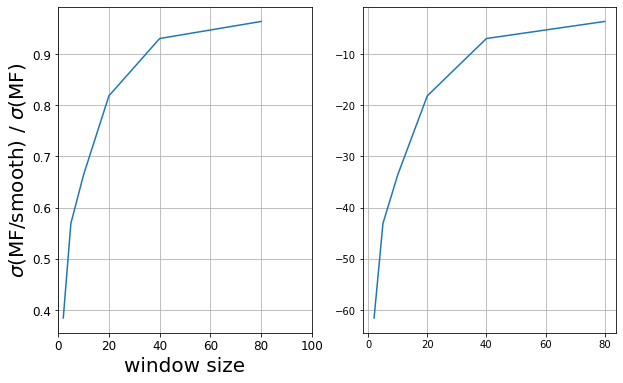

In [69]:
x = np.array(sizes)
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(121)
ax.plot(x,smooth_std/std_raw)
plt.grid()
plt.xlim(0.,100.)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('window size',fontsize=20)
plt.ylabel(r'$\sigma$'+'(MF/smooth) / '+r'$\sigma$'+'(MF)',fontsize=20)
plt.savefig('./standard_deviation_vs_median_size_{0}_renormalised.png'.format(filter1))
ax=fig.add_subplot(122)
ax.plot(x,(smooth_std-std_raw)*100./std_raw)
plt.grid()

In [70]:
smooth_dict.keys()

dict_keys([2, 5, 10, 20, 40, 80])

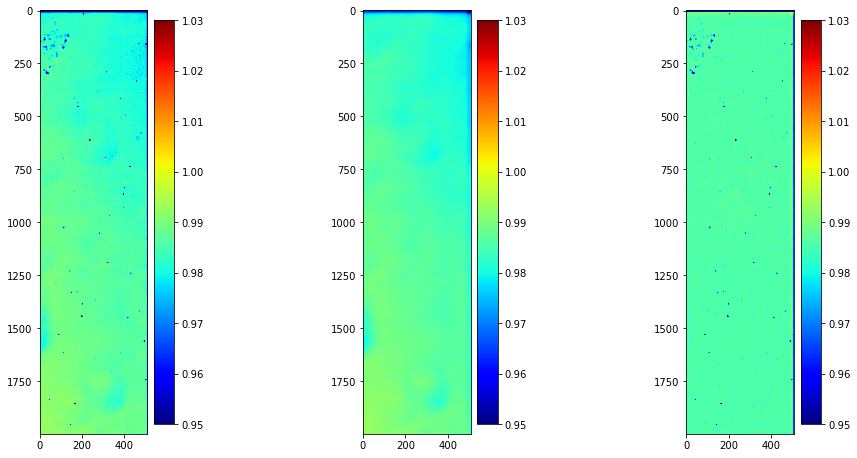

In [71]:
size_median_ = 40
fig = plt.figure(figsize=(14,14))
ax=fig.add_subplot(151)
im1 = ax.imshow(test,cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im1, ax=ax)
plt.savefig('./master_flat_{1}_{0}register_renormalised.png'.format(seg,filter1))
ax=fig.add_subplot(153)
im2=ax.imshow(smooth_dict[size_median_],cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im2, ax=ax)
plt.savefig('./smoothing_{1}_{0}register_renormalised.png'.format(seg,filter1))
ax=fig.add_subplot(155)
#im3=ax.imshow(test/smooth_dict[size_median_],cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
im3=ax.imshow(test*test_median_/smooth_dict[size_median_],cmap="jet",vmin=0.95,vmax=1.03)#,norm=LogNorm())
fig.colorbar(im3, ax=ax)
plt.savefig('./master_flat_smoothted_{1}_{0}register_renormalised.png'.format(seg,filter1))
#ax=fig.add_subplot(177)
#im4=ax.imshow(test/smooth_dict[80],cmap="jet",vmin=0.985,vmax=1.015)#,norm=LogNorm())
#fig.colorbar(im4, ax=ax)

In [74]:
print(np.median(test.ravel()))
print(np.median(smooth_dict[size_median_].ravel()))
#print(np.median(test.ravel()/smooth_dict[size_median_].ravel()))
print(np.median(test.ravel()*test_median_/smooth_dict[size_median_].ravel()))

0.9854820513768934
0.9857652069252847
0.9854742661793509


# Fix size and repeat for the blue filter 

In [75]:
size_median = 40

In [76]:
testr = test
smoothr = smooth_dict[size_median]
testr_median = np.median(testr.ravel())

In [77]:
testb = data0blue

In [78]:
#smooth4b = ndimage.gaussian_filter(testb, sigma=40)

In [79]:
smoothb = ndimage.median_filter(testb, size=size_median)

In [80]:
testb_median = np.median(data0blue.ravel())

In [81]:
#ratio_smooth = (testr.ravel()/smoothr.ravel())/(testb.ravel()/smoothb.ravel())
ratio_smooth = (testr.ravel()*testr_median/smoothr.ravel())/(testb.ravel()*testb_median/smoothb.ravel())

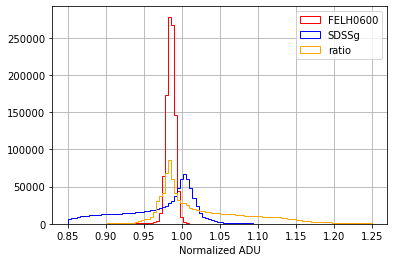

In [82]:
#fig = plt.figure(figsize=(8,8))
plt.hist(testr.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='r',label=filter1)
plt.hist(testb.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='b',label=filter2)
plt.hist(data0ratio.ravel(),bins=100,range=(0.85,1.25),histtype='step',color='orange',label='ratio')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()
plt.savefig('./histogram_master_flats_renormalised_{0}_{1}.png'.format(filter1,filter2))

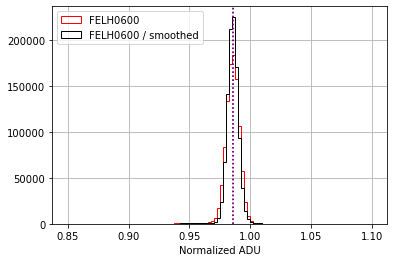

In [83]:
plt.hist(testr.ravel(),bins=100,range=(0.85,1.10),histtype='step',color='r',label=filter1)
plt.hist(testr.ravel()*testr_median/smoothr.ravel(),bins=100,range=(0.85,1.10),histtype='step',color='k',label=filter1+' / smoothed')
plt.axvline(x=np.median(testr.ravel()),ls=':',color='purple')
plt.axvline(x=np.median(testr.ravel()*testr_median/smoothr.ravel()),ls=':',color='purple')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend(loc="upper left")
plt.savefig('./histogram_{0}_with_without_smoothing_renormalised.png'.format(filter1))

In [85]:
print(np.median(testr.ravel()))
print(np.median(testr.ravel()*testr_median/smoothr.ravel()))

0.9854820513768934
0.9854742661793509


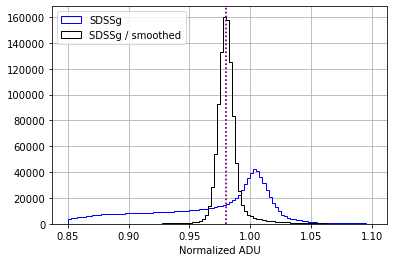

In [84]:
plt.hist(testb.ravel(),bins=100,range=(0.85,1.10),histtype='step',color='b',label=filter2)
plt.hist(testb.ravel()*testb_median/smoothb.ravel(),bins=100,range=(0.85,1.10),histtype='step',color='k',label=filter2+' / smoothed')
plt.axvline(x=np.median(testb.ravel()),ls=':',color='purple')
plt.axvline(x=np.median(testb.ravel()*testb_median/smoothb.ravel()),ls=':',color='purple')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend(loc="upper left")
plt.savefig('./histogram_{0}_with_without_smoothing_renormalised.png'.format(filter2))

In [86]:
print(np.median(testb.ravel()))
print(np.median(testb.ravel()*testb_median/smoothb.ravel()))

0.9803918463187504
0.9800655122663365


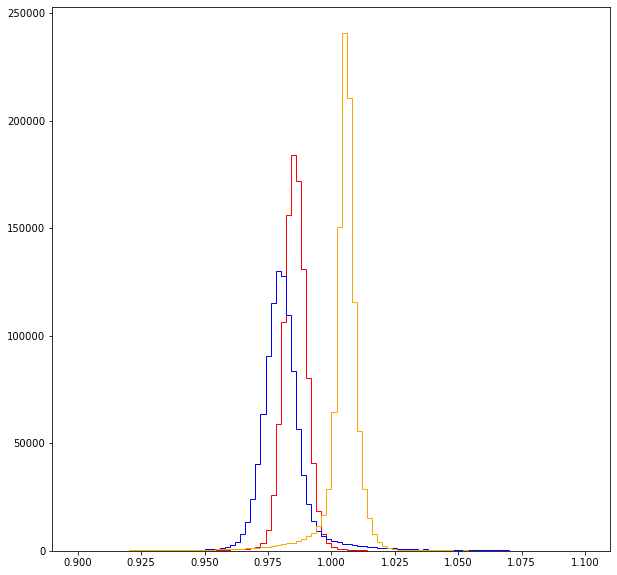

In [87]:
fig = plt.figure(figsize=(10,10))
nr,binsr,_=plt.hist(testr.ravel()*testr_median/smoothr.ravel(),bins=100,color='r',histtype='step',range=(0.9,1.1))
nb,binsb,_=plt.hist(testb.ravel()*testb_median/smoothb.ravel(),bins=100,color='b',histtype='step',range=(0.9,1.1))
nratio,binsratio,_=plt.hist(ratio_smooth,bins=100,color='orange',histtype='step',range=(0.9,1.1))

In [88]:
print(np.sum(nr),np.sum(nb))

1015563.0 1014283.0


In [89]:
print(len(test.ravel()))

1018000


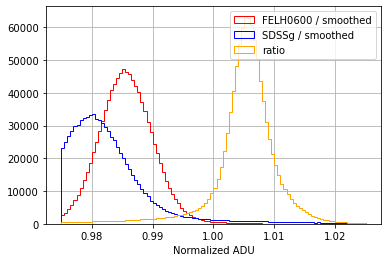

In [90]:
#USE this one 
nr,binsr,_=plt.hist(testr.ravel()*testr_median/smoothr.ravel(),bins=100,color='r',histtype='step',range=(0.975,1.025),label=filter1+' / smoothed')
nb,binsb,_=plt.hist(testb.ravel()*testb_median/smoothb.ravel(),bins=100,color='b',histtype='step',range=(0.975,1.025),label=filter2+' / smoothed')
#nratio,binsratio,_=plt.hist((testr.ravel()/smoothr.ravel())/(testb.ravel()/smoothb.ravel()),bins=100,color='orange',histtype='step',range=(0.975,1.025),label='ratio')
nratio,binsratio,_=plt.hist(ratio_smooth,bins=100,color='orange',histtype='step',range=(0.975,1.025),label='ratio')
plt.xlabel('Normalized ADU')
plt.grid()
plt.legend()
plt.savefig('./histogram_master_flats_smoothing_renormalised_{0}_{1}.png'.format(filter1,filter2))

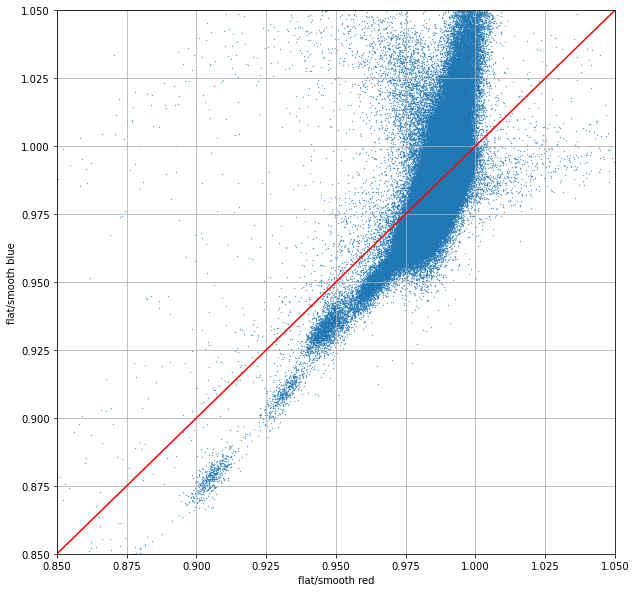

In [91]:
fig = plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)

#plt.plot(dred_c.ravel(),dblue_c.ravel(),ls='',marker='.')
#plt.scatter(np.log10(test.ravel()-smooth4.ravel()+1.),np.log10(testb.ravel()-smooth4b.ravel()+1.),s=15)
#plt.scatter(testr.ravel()/smoothr.ravel(),testb.ravel()/smoothb.ravel(),s=0.1)
plt.scatter(testr.ravel()*testr_median/smoothr.ravel(),testb.ravel()*testb_median/smoothb.ravel(),s=0.1)
plt.xlabel('flat/smooth red')
plt.ylabel('flat/smooth blue')
plt.xlim((0.85,1.05))
plt.ylim((0.85,1.05))
#plt.xscale("log")
#plt.yscale("log")
plt.plot(np.linspace(0.85,1.05,100),np.linspace(0.85,1.05,100),color='r')
plt.grid()

In [92]:
datared = testr.ravel()*testr_median/smoothr.ravel()
datablue = testb.ravel()*testb_median/smoothb.ravel()

In [110]:
min_val = 0.935
max_val = 1.015

In [111]:
#redmask = (testr.ravel()/smoothr.ravel()>=min_val)*(testr.ravel()/smoothr.ravel()<=max_val)
#bluemask = (testb.ravel()/smoothb.ravel()>=min_val)*(testb.ravel()/smoothb.ravel()<=max_val)
redmask = (datared>=min_val)*(datared<=max_val)
bluemask = (datablue>=min_val)*(datablue<=max_val)
jointmask = redmask*bluemask

In [112]:
#print(len(testr.ravel()/smoothr.ravel()))
#print(len((testr.ravel()/smoothr.ravel())[jointmask]))
print(len(datared))
print(len(datared[jointmask]))

1018000
993614


In [113]:
#sr = (testr.ravel()/smoothr.ravel())[jointmask]
#sb = (testb.ravel()/smoothb.ravel())[jointmask]
sr = datared[jointmask]
sb = datablue[jointmask]

In [114]:
coeff_rb = pearson_coeff(datared,datablue)
coeff_rb_restricted = pearson_coeff(sr,sb)

In [115]:
print(coeff_rb)
print(coeff_rb_restricted)

0.8526911555638752
0.7361289711975035


In [116]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, range=None, **kwargs )   :
        """
        Scatter plot colored by 2d histogram
        """
        if ax is None :
                fig , ax = plt.subplots(figsize=(10,10))
        if range is None:
                data , x_e, y_e = np.histogram2d( x, y, bins = bins)
        else:
                data , x_e, y_e = np.histogram2d( x, y, bins = bins, range=range)
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

        # Sort the points by density, so that the densest points are plotted last
        if sort :
                idx = z.argsort()
                x, y, z = x[idx], y[idx], z[idx]

        plt.scatter( x, y, c=z, **kwargs )
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize='large')
        return ax

/tmp/ipykernel_7611/894884257.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./scatter_plot_{1}_{2}_seg{0}_renormalised.png'.format(seg,filter1,filter2))
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_36/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


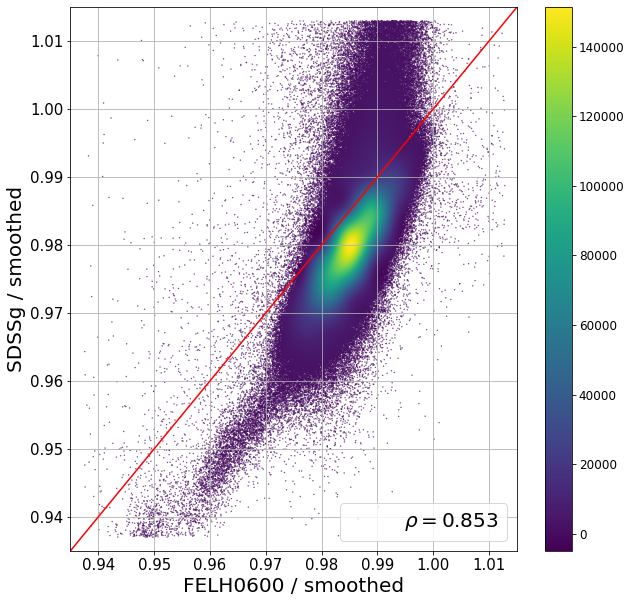

In [117]:
plot = density_scatter(sr,sb,marker='.',s=0.5)
plt.xlim(min_val,max_val)
plt.ylim(min_val,max_val)
plt.plot(np.linspace(min_val,max_val,100),np.linspace(min_val,max_val,100),color='r')
plt.plot([],[],ls='',label=r'$\rho = $'+'{0}'.format(coeff_rb.round(3)))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(filter1+' / smoothed',fontsize=20)
plt.ylabel(filter2+' / smoothed',fontsize=20)
plt.legend(fontsize=20)
plt.savefig('./scatter_plot_{1}_{2}_seg{0}_renormalised.png'.format(seg,filter1,filter2))

# Create fits files for median smoothed flats 

In [118]:
save_filters = ['FELH0600','SDSSg','SDSSr']

In [119]:
for filter in save_filters:
    print('#######################################'+filter)
    f = fits.open(filter_files[filter])
    
    new_hdul = fits.HDUList()
    hdu1 = fits.PrimaryHDU()
    hdu1.header = f[0].header
    hdu1.header['PROCESS'] = 'Smooth-Master-Flat'
    hdu1.data = f[0].data
    new_hdul.append(hdu1)
    for seg in range(1,num_segments+1):
        print(seg)
        hdu2 = fits.ImageHDU()
        data_seg = f[seg].data 
        data_seg_smooth = np.zeros(data_seg.shape)
        data_seg_smooth[shape0[0]-voverscan:,:] = data_seg[shape0[0]-voverscan:,:]
        data_seg_smooth[:,:hprescan] = data_seg[:,:hprescan]
        data_seg_smooth[:,shape0[1]-hoverscan:] = data_seg[:,shape0[1]-hoverscan:]
        data_seg_ = data_seg[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
        seg_median_ = np.median(data_seg_.ravel())
        smooth = ndimage.median_filter(data_seg_, size=size_median)
        #data_seg_smooth[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan] = data_seg_/smooth
        data_seg_smooth[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan] = data_seg_*seg_median_/smooth
        
        hdu2.header = f[seg].header
        hdu2.data = data_seg_smooth
        #median_flats[filter] = median_flat
        new_hdul.append(hdu2)
        print('----------')
    f.close()
    print(len(new_hdul))
    new_hdul.writeto('master_flat_median_{0}_{1}_{2}_{3}_renormalised_high_frequency_new.fits'.format(date_dict[filter].replace("-",""),filter,np.min(range_dict[filter]),np.max(range_dict[filter])), overwrite=True)

#######################################FELH0600
1
----------
2
----------
3
----------
4
----------
5
----------
6
----------
7
----------
8
----------
9
----------
10
----------
11
----------
12
----------
13
----------
14
----------
15
----------
16
----------
17
#######################################SDSSg
1
----------
2
----------
3
----------
4
----------
5
----------
6
----------
7
----------
8
----------
9
----------
10
----------
11
----------
12
----------
13
----------
14
----------
15
----------
16
----------
17
#######################################SDSSr
1
----------
2
----------
3
----------
4
----------
5
----------
6
----------
7
----------
8
----------
9
----------
10
----------
11
----------
12
----------
13
----------
14
----------
15
----------
16
----------
17


# TESTS 

In [66]:
#fred = fits.open('master_flat_median_20211007_FELH0600_63_115_renormalised_high_frequency.fits')
fred = fits.open('master_flat_median_20220316_SDSSr_110_124_renormalised_high_frequency.fits')
fblue = fits.open('master_flat_median_20220316_SDSSg_65_94_renormalised_high_frequency.fits')

In [67]:
print(fred[6].header['EXTNAME'])
print(fblue[6].header['EXTNAME'])

Segment05
Segment05


In [68]:
seg_ = 6

In [69]:
dred = fred[seg_].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
dblue = fblue[seg_].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]

(array([4.0000e+00, 3.0000e+00, 6.0000e+00, 7.0000e+00, 1.0000e+01,
        8.0000e+00, 6.0000e+00, 7.0000e+00, 1.6000e+01, 1.3000e+01,
        2.1000e+01, 2.1000e+01, 3.3000e+01, 2.3000e+01, 3.4000e+01,
        3.1000e+01, 3.5000e+01, 3.5000e+01, 4.3000e+01, 4.0000e+01,
        4.6000e+01, 5.4000e+01, 5.6000e+01, 7.9000e+01, 9.7000e+01,
        9.4000e+01, 1.3700e+02, 1.5100e+02, 2.3300e+02, 2.9000e+02,
        4.2300e+02, 6.0500e+02, 8.5100e+02, 1.2640e+03, 1.9330e+03,
        2.8600e+03, 4.2310e+03, 6.2860e+03, 9.1480e+03, 1.2592e+04,
        1.6818e+04, 2.2753e+04, 2.9068e+04, 3.6075e+04, 4.3716e+04,
        5.1444e+04, 5.8859e+04, 6.5099e+04, 6.9824e+04, 7.2221e+04,
        7.2309e+04, 6.9692e+04, 6.5520e+04, 5.9778e+04, 5.2652e+04,
        4.4877e+04, 3.7024e+04, 2.9758e+04, 2.2738e+04, 1.7080e+04,
        1.2300e+04, 8.9230e+03, 6.0750e+03, 4.0490e+03, 2.6620e+03,
        1.6670e+03, 1.0210e+03, 6.4800e+02, 3.3300e+02, 2.7900e+02,
        1.5900e+02, 9.4000e+01, 7.4000e+01, 5.90

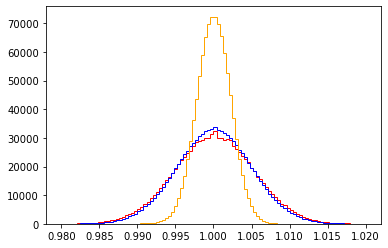

In [70]:
plt.hist(dred.ravel(),bins=100,range=(0.98,1.02),histtype='step',color='r')
plt.hist(dblue.ravel(),bins=100,range=(0.98,1.02),histtype='step',color='b')
plt.hist(dred.ravel()/dblue.ravel(),bins=100,range=(0.98,1.02),histtype='step',color='orange')

In [14]:
redmask = (dred.ravel()>=0.98)*(dred.ravel()<=1.02)
bluemask = (dblue.ravel()>=0.98)*(dblue.ravel()<=1.02)
totalmask = redmask*bluemask

In [15]:
dred_sub = dred.ravel()[totalmask]
dblue_sub = dblue.ravel()[totalmask]
ratio_sub = dred_sub/dblue_sub

In [16]:
print('Red', np.std(dred_sub))
print('Blue', np.std(dblue_sub))
print('Ratio', np.std(ratio_sub))

Red 0.004186144495509402
Blue 0.004914430753634515
Ratio 0.0020271772449246142


In [87]:
print('Red', np.std(dred.ravel()))
print('Blue', np.std(dblue.ravel()))
ratio_ = dred.ravel()/dblue.ravel()
print('Ratio', np.std(ratio_))

Red 0.01489232163446432
Blue 0.016477292552035557
Ratio 0.932165069171409


In [86]:
dred.ravel()[400]/dblue.ravel()[400]

1.0499719022611222